# App Physics 155 (lab)
## Feb. 21, 2018

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sp

<b>Example 5.1:</b> Integrating a function

Let us use the trapezoidal rule to calculate the integral of $x^4 − 2x + 1$ from $x = 0$ to $x = 2$. This is actually an integral we can do by hand, which means we don’t really need to do it using the computer in this case, but it’s a good
first example because we can check easily if our program is working and how accurate an answer it gives. Here is a program to do the integration using the trapezoidal rule with $N = 10$ slices:

In [3]:
def f(x):
    return x**4 - 2*x + 1

N = 10
trap = []
trap_error = []
while N <= 1000:
    a = 0.0
    b = 2.0
    h = (b-a)/N

    s = 0.5*(f(a)+f(b))
    for k in range(1,N):
        s += f(a + k*h)
    sumasum = h*s
    print(sumasum)
    trap.append(sumasum)
    
    dev = abs(4.4-sumasum)/4.4 * 100
    print("Error:",dev,"%\n")
    trap_error.append(dev)
    
    N *= 10

4.50656
Error: 2.4218181818181814 %

4.401066656
Error: 0.024242181818179272 %

4.400010666665601
Error: 0.0002424242181947084 %



<b>Exercise 5.2:</b> 

a) Write a program to calculate an approximate value for the integral $\int_0^2 x^4 - 2x + 1 \text{ d}x$ from Example 5.1, but using Simpson’s rule with 10 slices instead of the trapezoidal rule. You may wish to base your program on the trapezoidal rule program on page 142.

By manual integration:

\begin{equation}
    \frac{x^5}{5} - x^2 + x \text{ }\Big |_0^2 = 4.4
\end{equation}

b) Run the program and compare your result to the known correct value of 4.4. What is the fractional error on your calculation?

c) Modify the program to use a hundred slices instead, then a thousand. Note the improvement in the result. How do the results compare with those from Example 5.1 for the trapezoidal rule with the same numbers of slices?

In [4]:
def f(x):
    return x**4 - 2*x + 1

simp = []
simp_error = []
N = 10
while N <= 1000:
    a = 0.0
    b = 2.0
    h = (b-a)/N

    s = f(a)+f(b)
    for k in range(1,N//2 + 1):
        s += f(a+(2*k - 1)*h) * 4
    for k in range(1,N//2):
        s += f(a + 2*k*h) * 2
    suma = 1/3*h*s
    print(N,"slices:",suma)
    simp.append(suma)
    
    dev = abs(4.4-suma)/4.4 * 100
    print("Error:",dev,"%\n")
    simp_error.append(dev)
    
    N *= 10

10 slices: 4.400426666666667
Error: 0.009696969696972665 %

100 slices: 4.400000042666667
Error: 9.69696969186564e-07 %

1000 slices: 4.400000000004266
Error: 9.695274885953866e-11 %



In [5]:
fmt = '{:<25}{:<25}{:<25}{}'

print(fmt.format('Trapezoidal', 'Error %', 'Simpson', 'Error %\n'))
for i, (trap,trap_error,simp,simp_error) in enumerate(zip(trap,trap_error,simp,simp_error)):
    print(fmt.format(trap,trap_error,simp,simp_error))

Trapezoidal              Error %                  Simpson                  Error %

4.50656                  2.4218181818181814       4.400426666666667        0.009696969696972665
4.401066656              0.024242181818179272     4.400000042666667        9.69696969186564e-07
4.400010666665601        0.0002424242181947084    4.400000000004266        9.695274885953866e-11


<b>Exercise 5.3:</b> Consider the integral

\begin{equation}
    E(x) = \int_0^x e^{-t^2} \text{ d}t
\end{equation}

a) Write a program to calculate $E(x)$ for values of $x$ from 0 to 3 in steps of 0.1. Choose for yourself what method you will use for performing the integral and a suitable number of slices.

In [6]:
def E(t):
    return np.exp(-t**2)

N = 10
a = 0.0

for i in range (0,31):
    b = i/10
    h = (b-a)/N
    s = E(a)+E(b)
    for k in range(1,N//2 + 1):
        s += E(a+(2*k - 1)*h) * 4
    for k in range(1,N//2):
        s += E(a + 2*k*h) * 2
    suma = 1/3*h*s
    print("for x =",b,"\t",suma)

for x = 0.0 	 0.0
for x = 0.1 	 0.0996676643559
for x = 0.2 	 0.197365032922
for x = 0.3 	 0.291237896588
for x = 0.4 	 0.379652891756
for x = 0.5 	 0.461281141952
for x = 0.6 	 0.535153802544
for x = 0.7 	 0.600686131928
for x = 0.8 	 0.657670518992
for x = 0.9 	 0.706242322104
for x = 1.0 	 0.746824948254
for x = 1.1 	 0.780062040963
for x = 1.2 	 0.806744889953
for x = 1.3 	 0.827742364598
for x = 1.4 	 0.84393909419
for x = 1.5 	 0.856185631319
for x = 1.6 	 0.865262296608
for x = 1.7 	 0.871856605878
for x = 1.8 	 0.876552815634
for x = 1.9 	 0.879831270173
for x = 2.0 	 0.882074876854
for x = 2.1 	 0.883580088675
for x = 2.2 	 0.884570112043
for x = 2.3 	 0.885208553268
for x = 2.4 	 0.885612256974
for x = 2.5 	 0.885862589963
for x = 2.6 	 0.886014834875
for x = 2.7 	 0.886105658932
for x = 2.8 	 0.886158816317
for x = 2.9 	 0.886189344963
for x = 3.0 	 0.886206552246


b) When you are convinced your program is working, extend it further to make a graph of $E(x)$ as a function of $x$. If you want to remind yourself of how to make a graph, you should consult Section 3.1, starting on page 88.

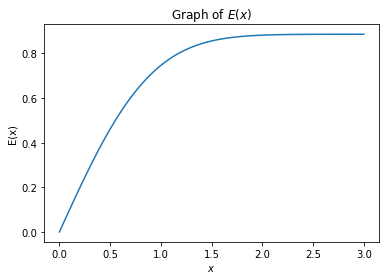

In [10]:
def EE(b):
    h = (b-a)/N
    s = E(a)+E(b)
    for k in range(1,N//2 + 1):
        s += E(a+(2*k - 1)*h) * 4
    for k in range(1,N//2):
        s += E(a + 2*k*h) * 2
    suma = 1/3*h*s
    return suma
    
x = np.linspace(0,3)
mp.plot(x, EE(x))
mp.xlabel("$x$")
mp.ylabel("E(x)")
mp.title("Graph of $E(x)$")
mp.show()

<b>Exercise 5.7: </b>Consider the integral

\begin{equation}
    I = \int_0^1 \sin^2 \sqrt{100x} \text{ d}x
\end{equation}

a) Write a program that uses the adaptive trapezoidal rule method of Section 5.3 and Eq. (5.34) to calculate the value of this integral to an approximate accuracy of $\epsilon = 10^{−6}$ (i.e., correct to six digits after the decimal point). Start with one single integration slice and work up from there to two, four, eight, and so forth. Have your program print out the number of slices, its estimate of the integral, and its estimate of the error on the integral, for each value of the number of slices $N$, until the target accuracy is reached. (Hint: You should find the result is around $I = 0.45$.)

b) Now modify your program to evaluate the same integral using the Romberg integration technique described in this section. Have your program print out a triangular table of values, as on page 161, of all the Romberg estimates of the integral.
Calculate the error on your estimates using Eq. (5.49) and again continue the calculation until you reach an accuracy of $\epsilon = 10^{−6}$. You should find that the Romberg method reaches the required accuracy considerably faster than the
trapezoidal rule alone.

In [12]:
def f(x):
    return (np.sin(np.sqrt(100*x)))**2

def I(i):
    N = 100
    a = 0.0
    b = 1.0
    h = (b-a)/N
    sout = 0
    s_in = 0

    for k in range(1,N,2):
        sout += f(a + k*h)
    sout *= h
    if i == 0:
        for k in range(1,N):
            s_in += f(a + k*h)
            s_in += 0.5*(f(a)+f(b))
            s_in *= 0.5*h
    else:
        s_in = 0.5*I(i-1)
    suma = s_in + sout
    return suma
    
I(100)

0.45737152034718009

In [14]:
def f(x):
    return np.sin(np.sqrt(100.*x))**2.

def R(less, greater, m):
    r_est = greater + (greater - less)/(4**m + 1)
    return r_est

def R_err(own, top, m):
    return (own - top)/(4**m + 1)

def trapezoidal(N, a, b):
    h = (b-a)/N
    s = 0.5*f(a) + 0.5*f(b)
    for k in range(1,N):
        s += f(a+k*h)
    return h*s

N = 10
a = 0.
b = 1.

# Initial trapezoidal estimates

less = trapezoidal(N, a, b) #R11
greater = trapezoidal(2*N, a, b) #R21

Rtab = [[less], [greater]]
i = 2
m = 1
err = R_err(greater, less, m)
end = False
while (err > 10**(-6)) or not end:
    end = False
    Rnext = R(less, greater, m)
    Rtab[i-1].append(Rnext)
    m += 1
    if m == i: # (Have we reached the end of each row?)
        end = True # Raise flag that it's ok to stop
        i += 1
        m = 1
        Rtab.append([trapezoidal(int(N*2**(i-1)), a, b)])
    err = R_err(greater, less, m-1)
    less = Rtab[i-2][m-2]
    greater = Rtab[i-1][m-2]

for row in Rtab:
    print(row)
print(err)

[0.40818651707222187]
[0.43818325386685419, 0.44418260122578068]
[0.45100552289757917, 0.45237010723193888, 0.4517597740170336]
[0.45459892283227127, 0.4551667525953188, 0.45481029929901784, 0.45520977790860156]
[0.45552243644249402, 0.45558496814927252, 0.45557676077250714, 0.45559140223471795, 0.45557974311287092]
[0.45575490226460796, 0.45578993409495538, 0.45576857672473231, 0.45579308741719665, 0.45576932309030516, 0.45579328418322834]
[0.45581311816443826, 0.45581708496068024, 0.45581654262913418, 0.45581750266630677, 0.45581672926689448, 0.455817526486062, 0.45581674083784313]
[0.45582767835827065, 0.45582986586235613, 0.45582853484026081, 0.45583006249161268, 0.45582858150256089, 0.45583007474510079, 0.45582858439546686, 0.45583007551093901]
[0.45583131879546451, 0.45583156745236963, 0.45583153293882883, 0.45583159363067755, 0.45583154460458203, 0.45583159512447174, 0.45583154532781905, 0.45583159521726269, 0.45583154537299858]
[0.45583222892906128, 0.4558323656402738, 0.455832

## Feb 28, 2018

<b>Exercise 5.15</b>: Create a user-defined function $f(x)$ that returns the value $1 + \frac{1}{2}tanh 2x$, then use a central difference to calculate the derivative of the function in the range $−2 ≤ x ≤ 2$. Calculate an analytic formula for the derivative and make a graph with your numerical result and the analytic answer on the same plot. It may help to plot the
exact answer as lines and the numerical one as dots. (Hint: In Python the $tanh$ function is found in the math package, and it’s called simply $tanh$.)

In [28]:
def f(x):
    return 1 + 0.5*np.tanh(2*x)

def df_x(x, slices):
    h = 4/slices
    num = f(x + h/2) - f(x - h/2)
    lim = num/h
    return lim

def d_plot(llim, ulim, slices):
    x = np.linspace(llim, ulim, slices)
    y1 = df_x(x, 100)
    y2 = x + 0.25*np.log(np.cosh(2*x))
    mp.plot(x,y1, "--", label = "Num. solution")
    mp.plot(x,y2, ":", label = "Math. solution")
    mp.xlabel("$x$")
    mp.ylabel("$f(x)$")
    mp.legend()
    mp.show()

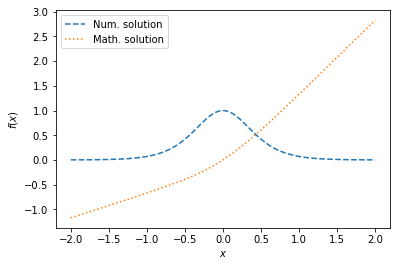

In [29]:
d_plot(-2,2, slices=100)

<b>Exercise 5.21</b>: Electric field of a charge distribution

Suppose we have a distribution of charges and we want to calculate the resulting electric field. One way to do this is to first calculate the electric potential $\phi$ and then take its gradient. For a point charge $q$ at the origin, the electric potential at a distance $r$ from the origin is $\phi = \frac{q}{4\pi\epsilon_0 r}$ and the electric field is $\vec{E} = −\vec{\nabla}\phi$.

a) You have two charges, of $\pm$ 1 C, 10 cm apart. Calculate the resulting electric potential on a 1 m $\times$ 1 m square plane surrounding the charges and passing through them. Calculate the potential at 1 cm spaced points in a grid and make a visualization on the screen of the potential using a density plot.

b) Now calculate the partial derivatives of the potential with respect to $x$ and $y$ and hence find the electric field in the $xy$ plane. Make a visualization of the field also. This is a little trickier than visualizing the potential, because the electric field has both magnitude and direction. One way to do it might be to make two density plots, one for the magnitude, and one for the direction, the latter using the “hsv” color scheme in pylab, which is a rainbow scheme that passes through all the colors but starts and ends with the same shade of red, which makes it suitable for representing things like directions or angles that go around the full circle and end up where they started. A more sophisticated visualization might use the arrow object from the visual package, drawing a grid of arrows with direction and length chosen to represent the field.

c) Now suppose you have a continuous distribution of charge over an $L \times L$ square. The charge density in $Cm^{−2}$ is

\begin{equation}
    \sigma (x,y) = q_0 \sin \frac{2\pi x}{L} \sin\frac{2\pi y}{L}
\end{equation}

Calculate and visualize the resulting electric field at 1 cm-spaced points in 1 square meter of the $xy$ plane for the case where L = 10 cm, the charge distribution is centered in the middle of the visualized area, and $q_0$ = 100 $Cm^{−2}$. You will have to perform a double integral over $x$ and $y$, then differentiate the potential with respect to position to get the electric field. Choose whatever integration method seems appropriate for the integrals.

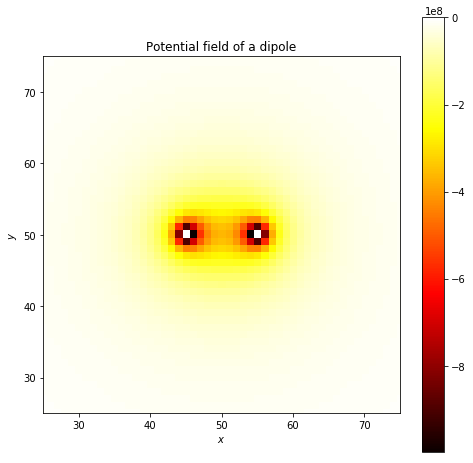

TypeError: potential() takes 1 positional argument but 2 were given

In [116]:
q1 = 1
q2 = -1
q1loc = (0,-5)
q2loc = (0,5)
potential_arr = np.array(np.zeros([101,101]))

def potential(curcoor):
    rq1 = np.sqrt((q1loc[1] - curcoor[1])**2 + (q1loc[0] - curcoor[0])**2)
    rq2 = np.sqrt((q2loc[1] - curcoor[1])**2 + (q2loc[0] - curcoor[0])**2)
    if (rq1 != 0) and (rq2 != 0):
        return (q1*q2)/(4*np.pi*sp.epsilon_0*rq1*rq2)
    else:
        return 0
    
for y, row in enumerate(potential_arr):
    for x, val in enumerate(row):
        curcoord = (y-50, x-50)
        potential_arr[y,x] = potential(curcoord)
        
xgrid = np.linspace(-50,50,101)
ygrid = np.linspace(-50,50,101)

fig, ax1 = mp.subplots(figsize=(8, 8))
pot = ax1.imshow(potential_arr)
ax1.set_xlim(25,75)
ax1.set_ylim(25,75)
mp.xlabel("$x$")
mp.ylabel("$y$")
mp.title("Potential field of a dipole")
mp.hot()
fig.colorbar(pot,ax=ax1, cmap="hot")
mp.show()

N = 10000
h = 100/N

Ex = np.array(np.zeros((101,101)))
Ey = np.array(np.zeros((101,101)))
for y, row in enumerate(Ex):
    for x, val in enumerate(row):
        ### Complete the following statements to get partial-x and partial-y (central difference approximation).
        ### Remember that you need to subtract 50 from y and x before inputting them into the potential function.
        ### Also remember the order with which the potential function accepts values!
        partialx = (potential(y + h/2) - potential(y - h/2)/h)
        #Ex[y,x] = 
        partialy = (potential(x + h/2) - potential(x - h/2)/h)
        #Ey[y,x] = 

In [95]:
#!/usr/bin/env python
"""
Initial code for Electric Field of a Charge Distribution (Newman 5.21)
======================================================================

This is a base implementation of exercise 5.21 that plots the electric potential and 
electric field of two point charges with opposite signs. 

For a charge distribution, the potential may be found as the summation of the potential due
to each individual charge, while the electric field is simply the negative gradient of the
potential function.

Parts of the code with '...' will need to be completed.
Comments prepended with ### are guide questions.
"""

__author__ = "Micholo Medrana"
__credits__ = "Mark Newman"

# Initialize potential due to charges
q1 = 1
q2 = -1
q1loc = (0,-10) #location of charge 1
q2loc = (0,10) #location of charge 2

potential_arr = np.array(np.zeros((101,101))) # initialize potential array

def potential(curcoord): 
    '''
    Function to calculate electric potential due to our two charges at a location curcoord = (y, x)
    '''
    rq1 = np.sqrt((q1loc[0]-curcoord[0])**2 + (q1loc[1]-curcoord[1])**2) # calculate distance of location to charge 1
    rq2 = ... # calculate distance of location to charge 2
    if (rq1 != 0) and (rq2 != 0): # if our current coordinate is not at the charge
        return ... # calculate potential
    else:
        return 0 # potential diverges at locations of charges

for y, row in enumerate(potential_arr):
    for x, val in enumerate(row):
        curcoord = (y-50, x-50) # get current coordinates
        ### Why must we subtract 50 from x and y here? hint: Python indexing
        potential_arr[y,x] = potential(curcoord)

# Visualize our potential

xgrid = np.linspace(-50,50,101)
ygrid = np.linspace(-50,50,101)

# fig = plt.figure()
# ax = fig.add_subplot(111)

fig, (ax1, ax2) = plt.subplots(figsize=(8, 3), ncols=2)
#pot = ax1.imshow(potential_arr)
pot = ax1.contourf(xgrid, ygrid, potential_arr, cmap='RdBu_r')
ax1.contour(xgrid, ygrid, potential_arr, colors='k', linestyles='solid')
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_xlim(-15,15)
ax1.set_ylim(-15,15)
ax1.set_aspect('equal')
fig.colorbar(pot,ax=ax1)
### Add a title to this subfigure.

# Calculate E = -gradient phi
# note that gradient (2D) is just (\partial f/\partial x) xhat + (\partial f/\partial y) yhat

h = 0.01 # Choose some h.
### Can we adaptively optimize this value to be within a reasonable error?

Ex = np.array(np.zeros((101,101))) #initialize array for x-components of field
Ey = np.array(np.zeros((101,101))) #initialize array for y-components of field
for y, row in enumerate(Ex):
    for x, val in enumerate(row):
        ### Complete the following statements to get partial-x and partial-y (central difference approximation).
        ### Remember that you need to subtract 50 from y and x before inputting them into the potential function.
        ### Also remember the order with which the potential function accepts values!
        partialx = ...
        Ex[y,x] = ...
        partialy = ...
        Ey[y,x] = ...

# Plot the electric field using streamplot
color = 2 * np.log(np.hypot(Ex,Ey))
ele = ax2.streamplot(xgrid, ygrid, Ex, Ey, color=color, linewidth=1, cmap = plt.cm.inferno,
             density=2, arrowstyle='->', arrowsize=1.5)
             ### Study the parameters of the streamplot function. What does each do?
             ### See: https://matplotlib.org/gallery/images_contours_and_fields/plot_streamplot.html
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_xlim(-50,50)
ax2.set_ylim(-50,50)
ax2.set_aspect('equal')
fig.colorbar(ele.lines,ax=ax2)
### Add a title to this subfigure.
plt.show()

### Check your plots and see if they correspond to that of a dipole potential and electric field.
### For enrichment, you can modify the code to plot the field of a quadrupole, octapole, or any 
### arbitrary charge distribution.

TypeError: float() argument must be a string or a number, not 'ellipsis'